In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [30]:
# seperating the categorical and numerical columns

catvars = list(df.select_dtypes(include=['object']).columns)

numvars = list(df.select_dtypes(include=['int32','int64','float32','float64']).columns)


print(catvars,numvars)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [31]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Handling Null values

In [32]:
df.shape

(215, 15)

In [33]:
def plotdistplot(col):
    
    plt.figure(figsize=(15,7))
    sn.distplot(df['salary'],kde=True,hist=False,label='Actual Salary',color='orange')
    sn.distplot(df[col],kde=True,hist=False,label=col,color='black')
    

In [34]:
df['salary'].value_counts()

300000.0    22
250000.0    18
240000.0    15
260000.0     7
360000.0     6
200000.0     6
265000.0     6
220000.0     5
275000.0     5
210000.0     4
400000.0     4
270000.0     4
216000.0     3
350000.0     3
500000.0     3
252000.0     2
236000.0     2
230000.0     2
280000.0     2
218000.0     2
204000.0     2
276000.0     2
255000.0     1
285000.0     1
340000.0     1
690000.0     1
233000.0     1
290000.0     1
650000.0     1
264000.0     1
225000.0     1
940000.0     1
393000.0     1
380000.0     1
420000.0     1
425000.0     1
336000.0     1
231000.0     1
268000.0     1
450000.0     1
287000.0     1
411000.0     1
320000.0     1
278000.0     1
295000.0     1
Name: salary, dtype: int64

In [35]:
mostfreq = list(dict(df['salary'].value_counts()).items())[0]
mostfreq

(300000.0, 22)

In [36]:
df['salary'].mode()[0]

300000.0

In [37]:
df['salary_mean'] = df['salary'].fillna(df['salary'].mean())
df['salary_median'] = df['salary'].fillna(df['salary'].median())
df['salary_mode'] = df['salary'].fillna(df['salary'].mode()[0])
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


In [38]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
salary_mean        0
salary_median      0
salary_mode        0
dtype: int64

In [39]:
df.shape

(215, 18)

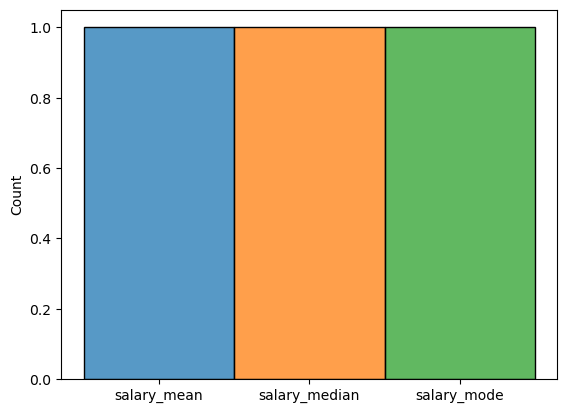

In [40]:
sallist = ['salary_mean','salary_median','salary_mode']
for sal in sallist:
    sns.histplot(sal)

In [41]:
# filling the salary with mean

df['salary'] = df['salary'].fillna(df['salary'].mean())
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [42]:
df = df.drop(columns=['salary_mean', 'salary_median', 'salary_mode'],axis=1)
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## EDA

In [43]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

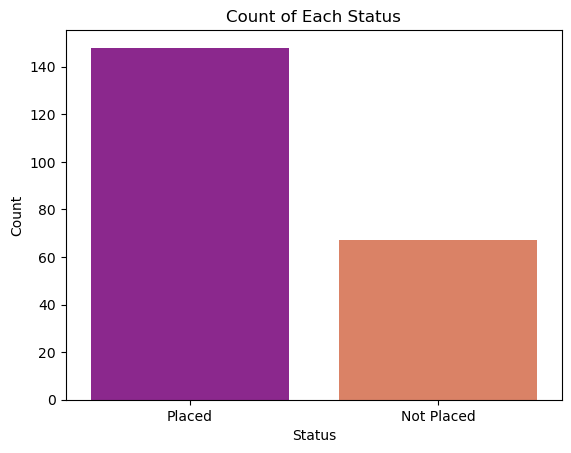

In [45]:
sns.countplot(x='status', data=df,palette='plasma')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Each Status')
plt.show()

Count Plot for feature gender is shown ↓


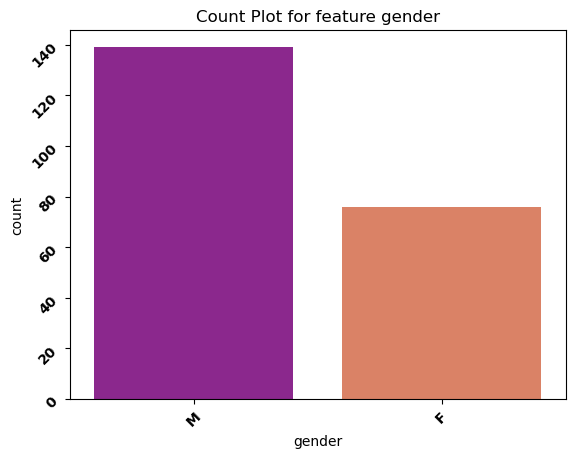

Count Plot for feature ssc_b is shown ↓


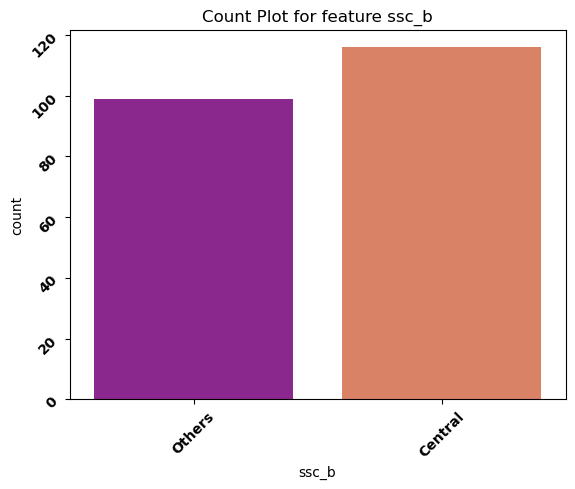

Count Plot for feature hsc_b is shown ↓


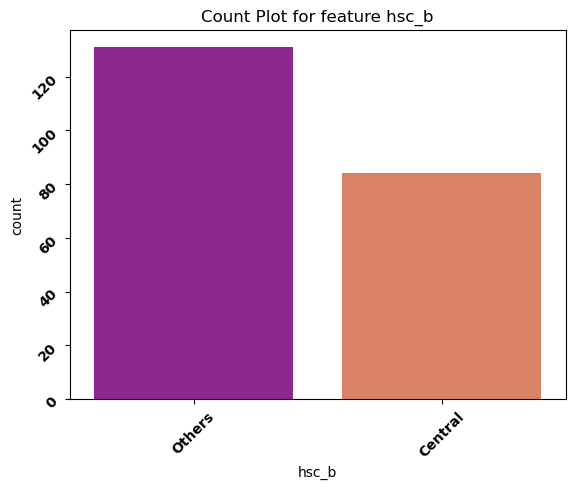

Count Plot for feature hsc_s is shown ↓


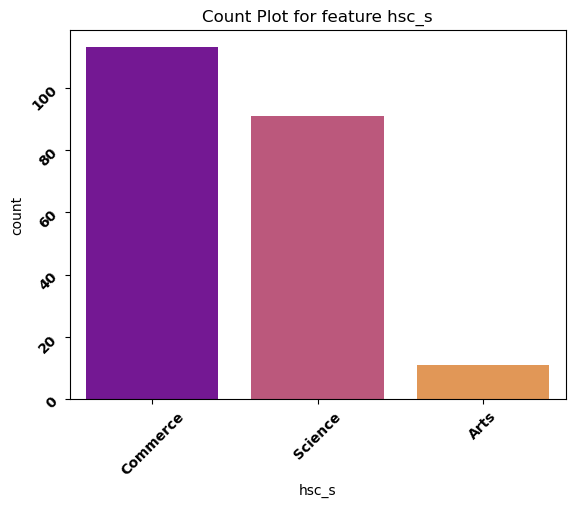

Count Plot for feature degree_t is shown ↓


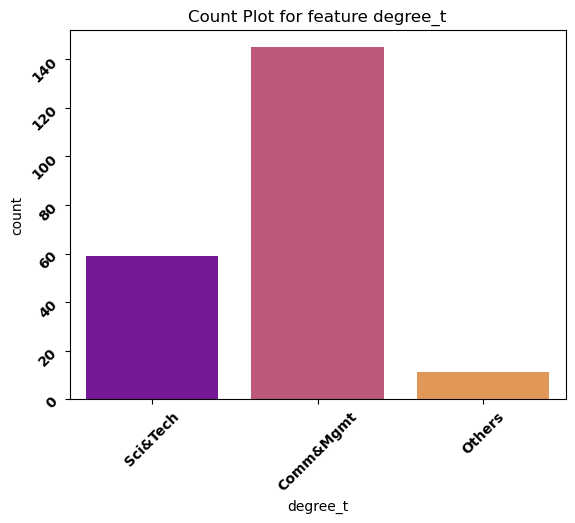

Count Plot for feature workex is shown ↓


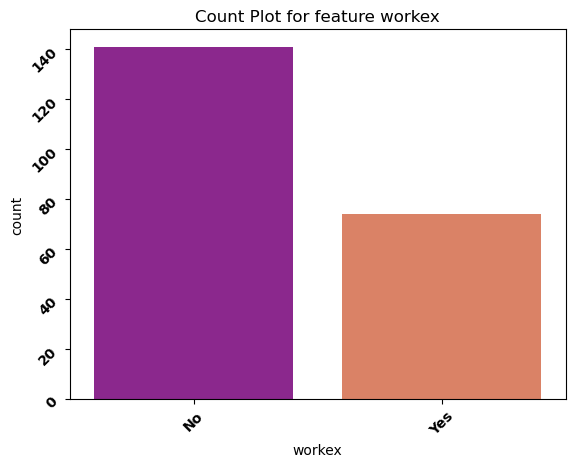

Count Plot for feature specialisation is shown ↓


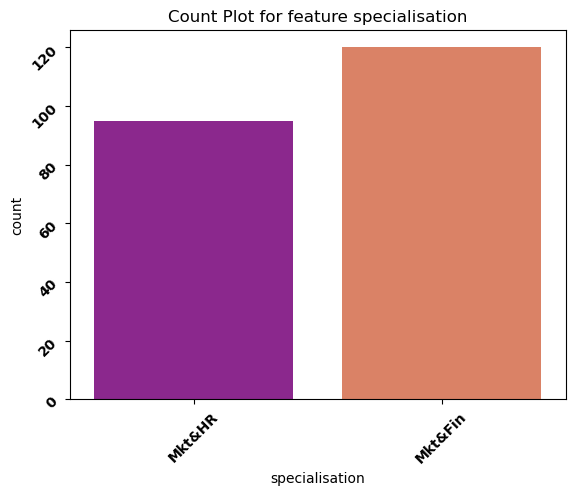

Count Plot for feature status is shown ↓


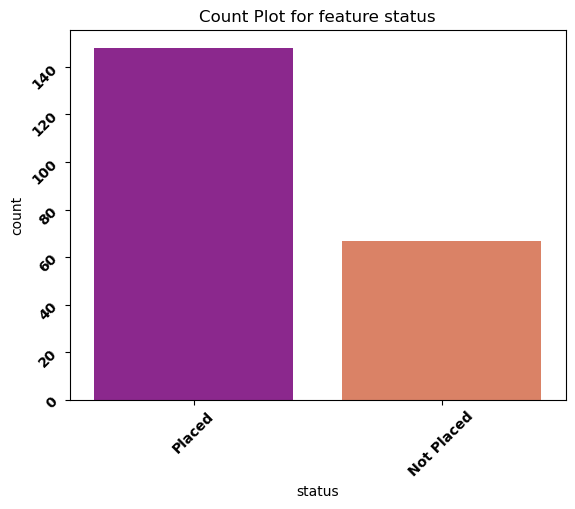

In [46]:
def valuecount(col):
    
    return dict(df[col].value_counts())

def getcountplot(col):
    
    sns.countplot(x=col, data=df,palette='plasma')
    plt.xticks(rotation = 45,fontweight = 'bold',fontsize = '10')
    plt.yticks(rotation = 45,fontweight = 'bold',fontsize = '10')
    plt.title(f'Count Plot for feature {col}')
    plt.show()
    

for col in catvars:
    print(f'Count Plot for feature {col} is shown ↓')
    getcountplot(col)
    print('='*75)

In [47]:
getfinaldict = {}
for col in catvars:
    getfinaldict[col] = valuecount(col)
getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [48]:
# top science students placed

df[(df['degree_t']=='Sci&Tech')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)
    

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [49]:
# top Comm&Mgt students placed

df[(df['degree_t']=='Comm&Mgmt')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)
 

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0


In [50]:
# max and min salary
# observation : max salary : 9,40,000 and min salary : 2,00,000

df[(df['salary']==max(df['salary'])) | (df['salary']==min(df['salary']))]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [51]:
df['salary'].mean()

288655.40540540544

In [52]:
# students with salary more than avg salary science dept

df[(df['degree_t']=='Sci&Tech')&(df['salary']>df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
1,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
2,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
3,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
8,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0


In [53]:
# students with salary more than avg salary science dept

df[(df['degree_t']=='Sci&Tech')&(df['salary']>df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index().shape

(18, 16)

In [54]:
# students with salary more than avg salary Comm&Mgmt dept

df[(df['degree_t']=='Comm&Mgmt')&(df['salary']>df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,85,86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
5,210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
6,21,22,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
7,101,102,M,63.00,Central,72.00,Central,Commerce,68.00,Comm&Mgmt,No,78.00,Mkt&HR,60.44,Placed,380000.0
8,104,105,M,69.00,Central,63.00,Others,Science,65.00,Comm&Mgmt,Yes,55.00,Mkt&HR,58.23,Placed,360000.0
9,57,58,M,68.00,Central,76.00,Central,Commerce,74.00,Comm&Mgmt,No,80.00,Mkt&Fin,63.59,Placed,360000.0


In [55]:
# students with salary more than avg salary Comm&Mgmt dept

df[(df['degree_t']=='Comm&Mgmt')&(df['salary']>df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index().shape

(32, 16)

<Axes: xlabel='degree_t'>

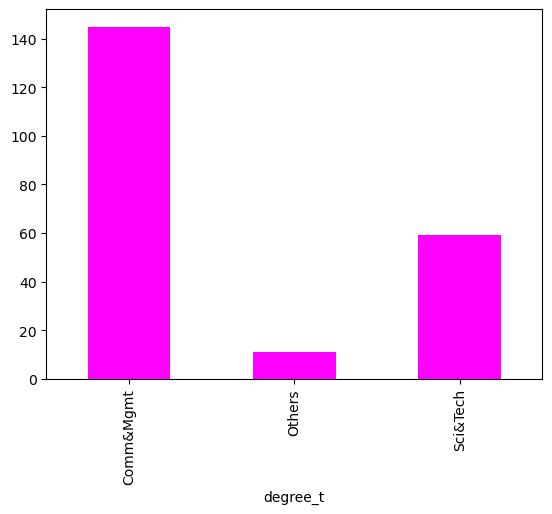

In [56]:
# maximum students placed are from comm&mgt

df.groupby(['degree_t'])['status'].count().plot(kind = 'bar',color = 'magenta')

In [57]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

<Axes: xlabel='specialisation'>

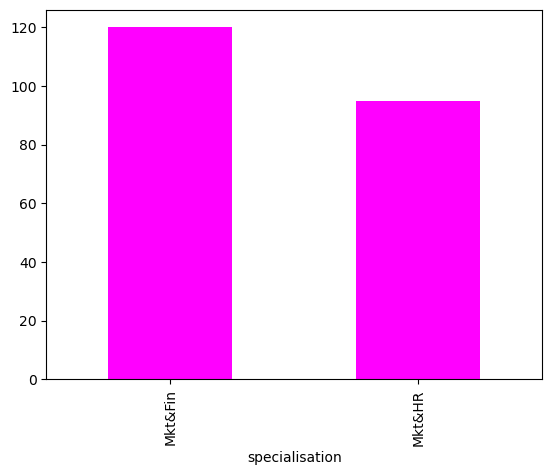

In [58]:
# Marketing and Finance specialisation are placed more

df.groupby(['specialisation'])['status'].count().plot(kind = 'bar',color = 'magenta')

<Axes: ylabel='status'>

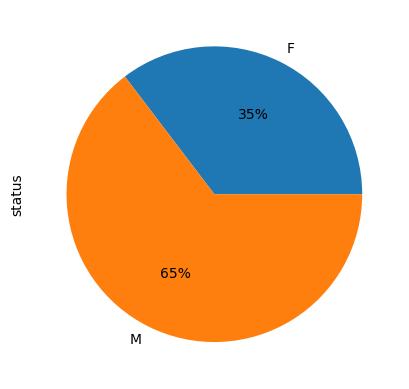

In [59]:
# females placed 35% and males 65%

df.groupby(['gender'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%')

In [60]:
# max female salary ~ 6,50,000

temp = df[df['gender']=='F']
temp[temp['salary']==max(temp['salary'])].style.background_gradient(cmap = 'plasma')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
177,178,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,70.810000,Placed,650000.000000


<Axes: ylabel='status'>

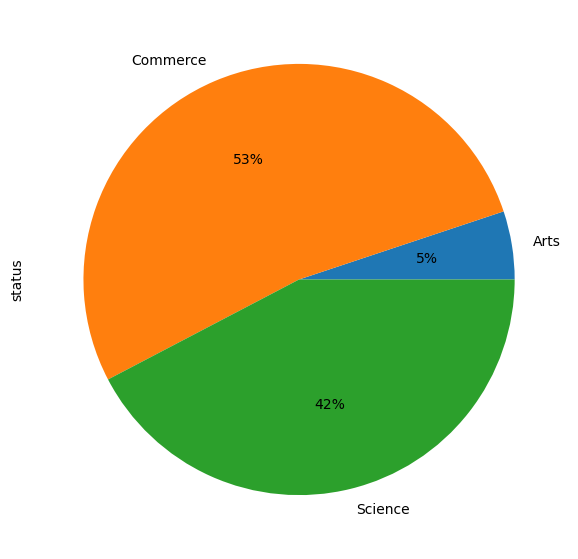

In [61]:
df.groupby(['hsc_s'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%',figsize=(15,7))

In [62]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [63]:
getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [64]:
len(getfinaldict['status']),len(getfinaldict['degree_t'])

(2, 3)

In [65]:
boolcols = [key for key,value in getfinaldict.items() if len(getfinaldict[key])==2]
tripcols = [key for key in list(getfinaldict.keys()) if key not in boolcols]

print(boolcols,tripcols)

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


In [66]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


## Label Encoding process

In [67]:
def labelencode(le,col):
    
    df[col] = le.fit_transform(df[col])
    
    
getmappings = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in list(getfinaldict.keys()):
    labelencode(le,col)
    getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))
    

df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [68]:
df.shape

(215, 15)

In [69]:
# this was the internal mapping structure followed by label encoder for mapping

getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [70]:
# removing unwated columns

df = df.drop(['sl_no'],axis=1)
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


## Numerical Columns EDA

In [71]:
numvars[1:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution plots for col : ssc_p are shown ↓


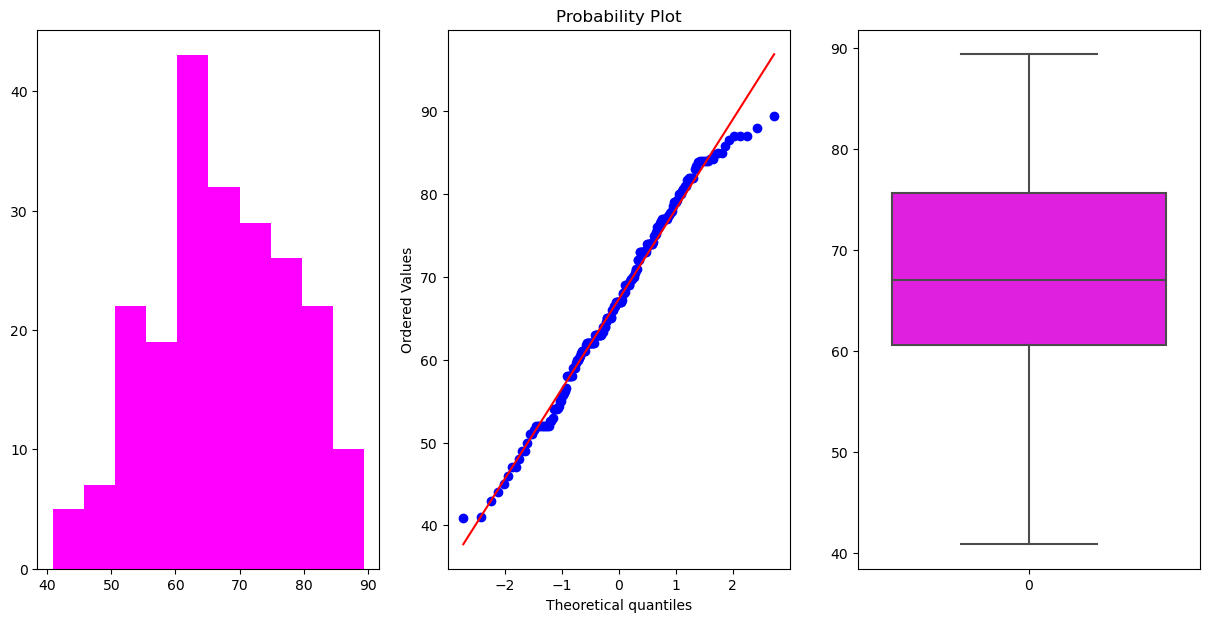

Distribution plots for col : hsc_p are shown ↓


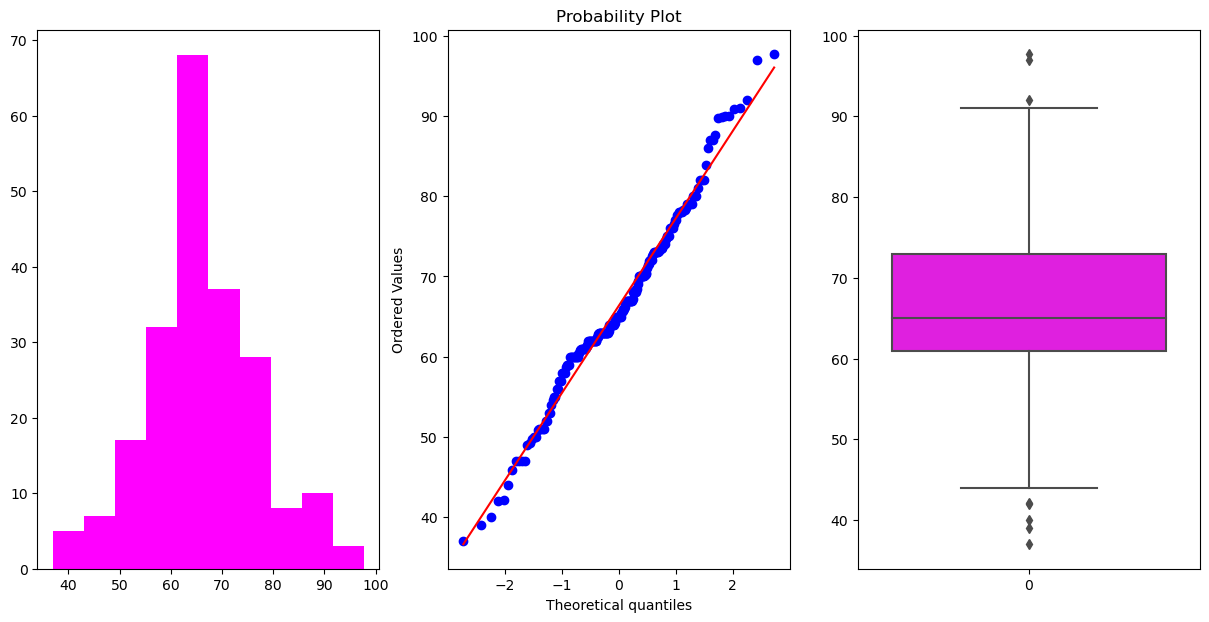

Distribution plots for col : degree_p are shown ↓


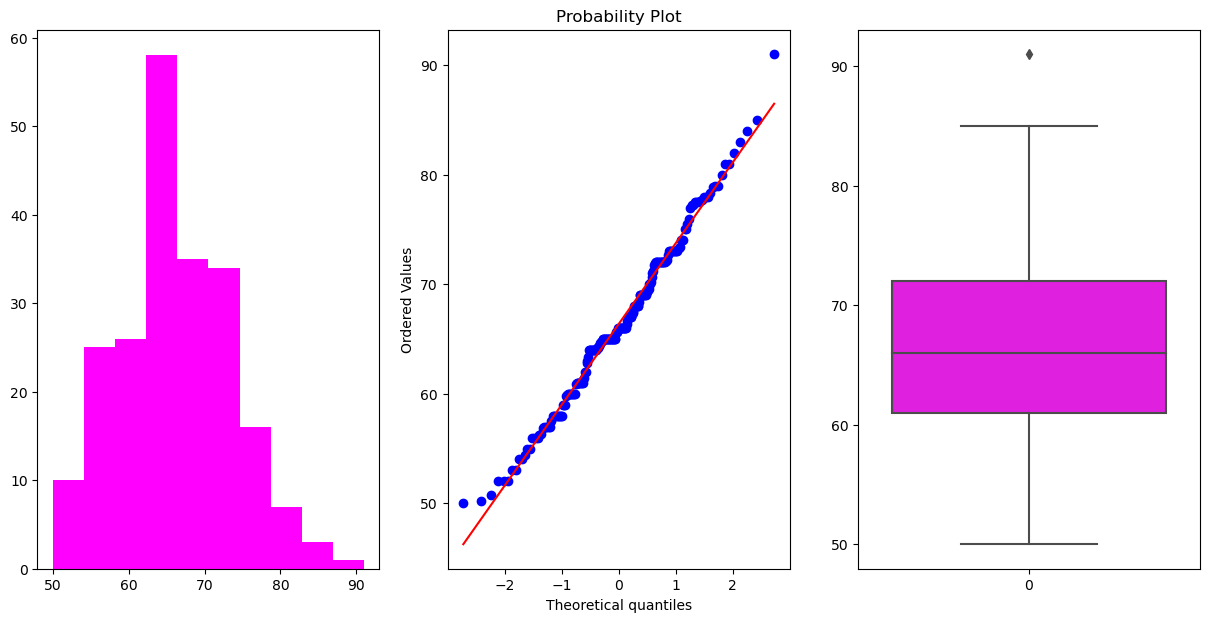

Distribution plots for col : etest_p are shown ↓


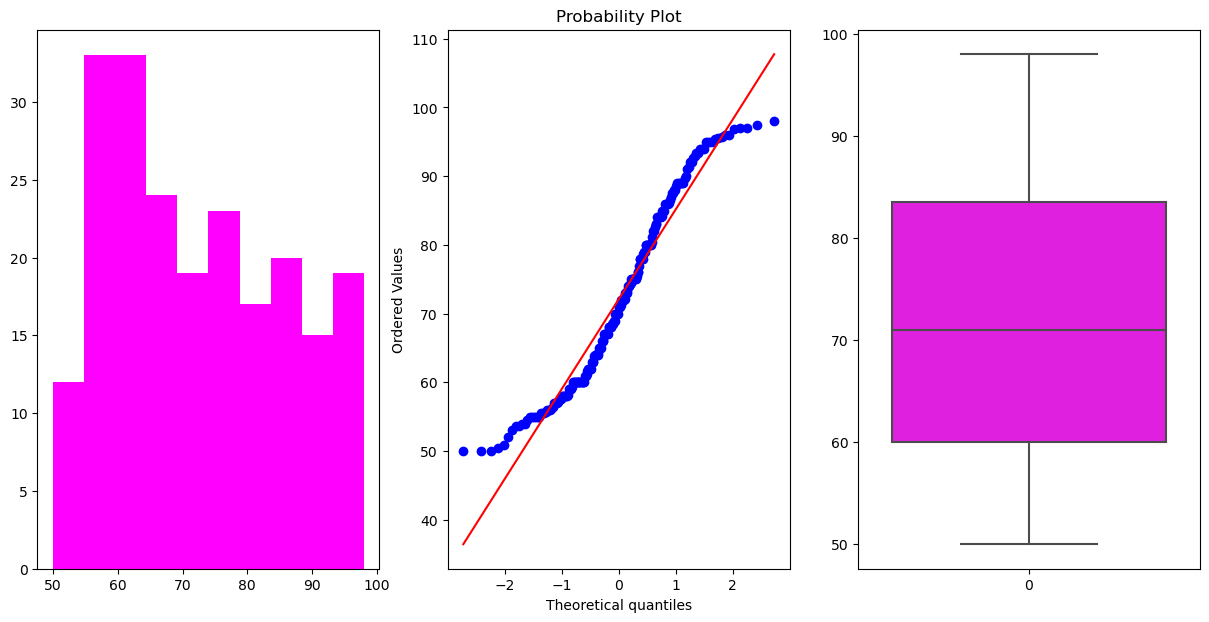

Distribution plots for col : mba_p are shown ↓


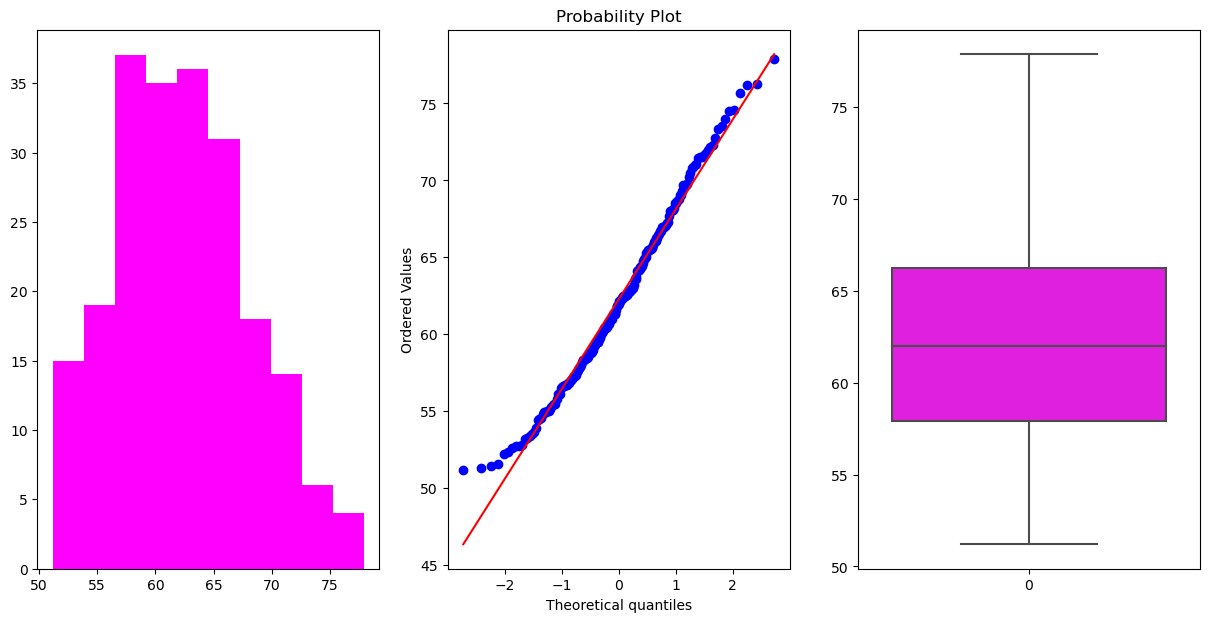

Distribution plots for col : salary are shown ↓


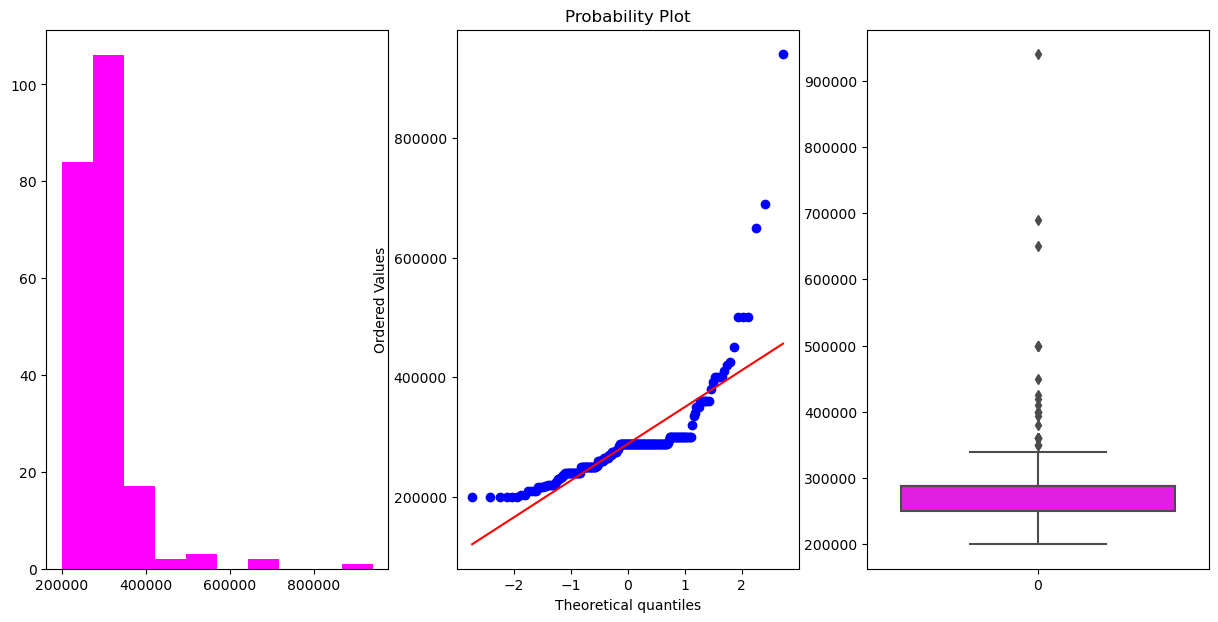

In [73]:
import scipy.stats as stats

def getplots(df,col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(x=col,data=df,color='magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col],color='magenta')
    
    plt.show()
    
    
for col in numvars[1:]:
    print(f'Distribution plots for col : {col} are shown ↓')
    getplots(df,col)
    print('='*10)

# Feature Selection

In [80]:
print(len(df.columns))

14


In [81]:
numeric_df = df.select_dtypes(include=[np.number])

# Check the number of numeric columns
print(len(numeric_df.columns))

14


In [82]:
print("NaNs in each column:")
print(numeric_df.isna().sum())

print("Infinite values in each column:")
print(np.isinf(numeric_df).sum())

NaNs in each column:
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64
Infinite values in each column:
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


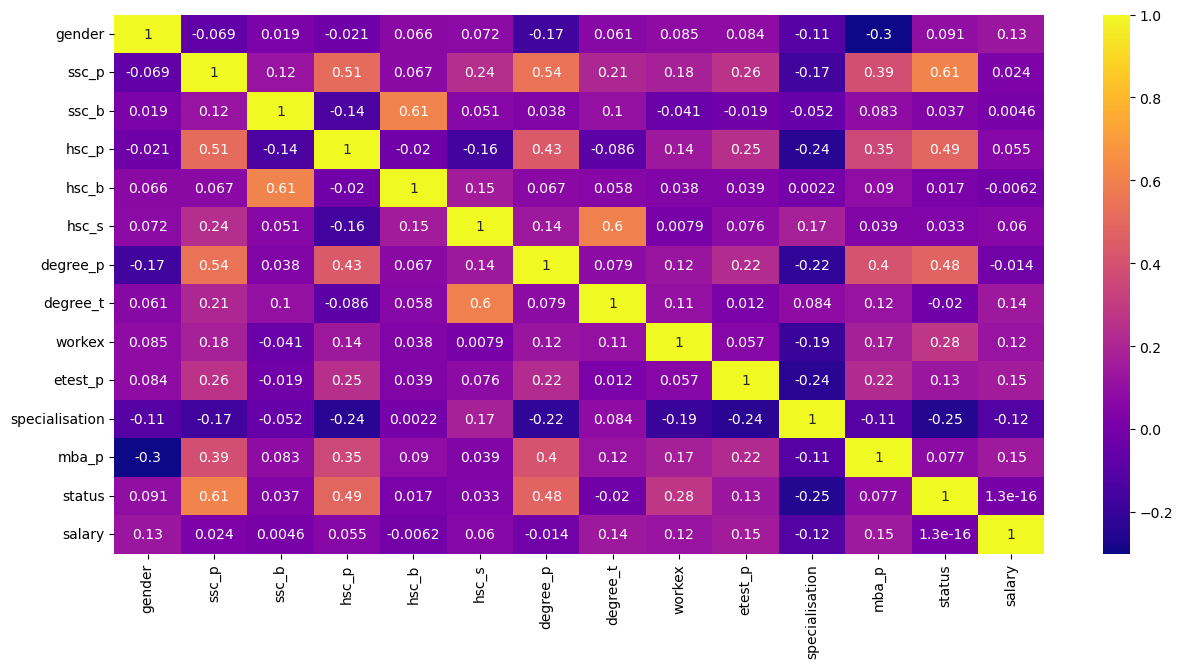

In [83]:
# checking for tightly correlated features

plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

In [84]:
'''
We will drop the salary column as well
coz after getting the placement we will get to know the salary right!

'''


data = df.copy()
test = data['status']
train = data.drop(['status','salary'],axis = 1)
train.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28


In [85]:
## extratrees classifier

from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier()
ec.fit(train,test)

ExtraTreesClassifier()

<Axes: >

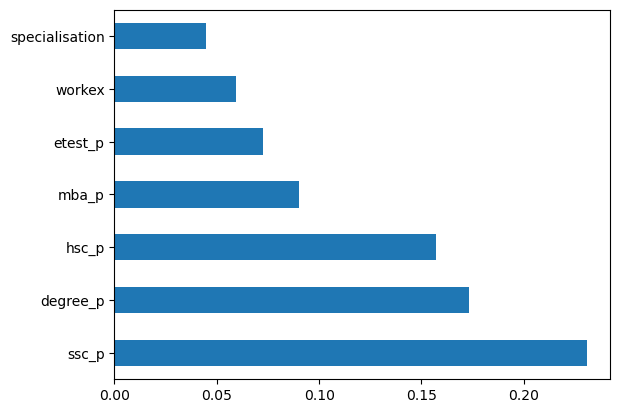

In [86]:
featbar = pd.Series(ec.feature_importances_,index=train.columns)
featbar.nlargest(7).plot(kind = 'barh')

<Axes: >

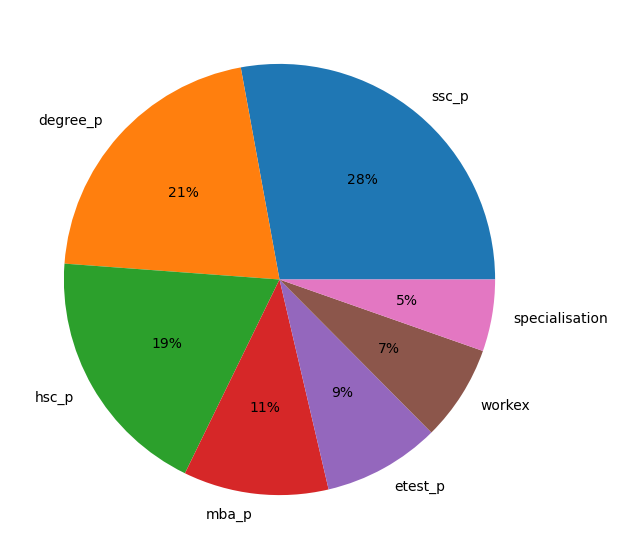

In [87]:
featbar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize = (15,7))

<Axes: >

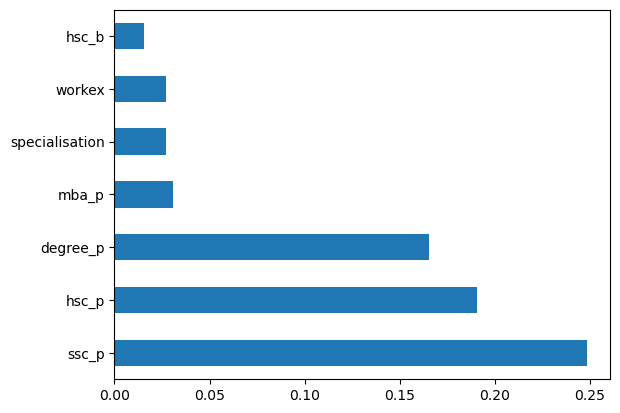

In [88]:
# mutual classif

from sklearn.feature_selection import mutual_info_classif
mc = mutual_info_classif(train,test)
ax = pd.Series(mc,index=train.columns)
ax.nlargest(7).plot(kind = 'barh')

<Axes: >

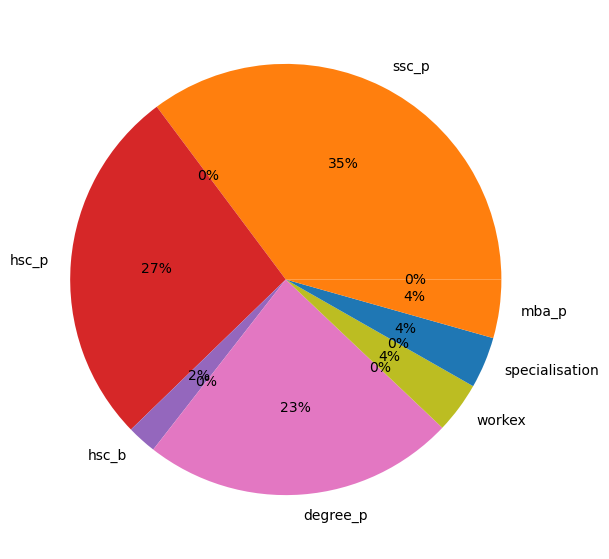

In [89]:
pd.Series(mc,index=train.columns).plot(kind = 'pie',autopct='%1.0f%%',figsize = (15,7))

In [90]:
'''
Selecting the top 10 contributing features in both cases
and then we will do the intersection of both the results
so that we will get atleast top 5 most contributing features!

'''

featcol = list(featbar.nlargest(10).index)
mutclasif = list(ax.nlargest(10).index)
commoncols = list(set(featcol).intersection(set(mutclasif)))
print(commoncols)

['ssc_p', 'workex', 'specialisation', 'degree_p', 'gender', 'mba_p', 'hsc_p', 'ssc_b']


In [91]:
# selecting the common cols and will do training on these cols!
# these cols were selected as a nlargest result of 2 feature selection techniques!

train = df[commoncols]
train.head()

,ssc_p,workex,specialisation,degree_p,gender,mba_p,hsc_p,ssc_b
0,67.00,0,1,58.00,1,58.80,91.00,1
1,79.33,1,0,77.48,1,66.28,78.33,0
2,65.00,0,0,64.00,1,57.80,68.00,0
3,56.00,0,1,52.00,1,59.43,52.00,0
4,85.80,0,0,73.30,1,55.50,73.60,0


In [92]:
'''
From the above DF we notice that gender,specialisation,degree_t,workex are the 
categorical columns and they make sense isn't it?,for any placement drive
students are first filtered on basis of their boards,sem scores which in this case are {mba_p,ssc_p,degree_p,hsc_p}
and then workexperience also matters a lot!,then specialisation as well,gender is also important
because now-a-days few companies focus on women empowerment,so yes,all the features make perfect sense!

'''
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [96]:
print(train.columns)


Index(['ssc_p', 'workex', 'specialisation', 'degree_p', 'gender', 'mba_p',
       'hsc_p', 'ssc_b'],
      dtype='object')


In [97]:
# renaming the cols

train = train[['gender','specialisation','workex','ssc_p','hsc_p','degree_p','mba_p']]
train.columns = ['Gender','Specialisation','Work Experience','SSC_p','High School_p','Degree_p','MBA_p']
train.head()

,Gender,Specialisation,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
0,1,1,0,67.00,91.00,58.00,58.80
1,1,0,1,79.33,78.33,77.48,66.28
2,1,0,0,65.00,68.00,64.00,57.80
3,1,1,0,56.00,52.00,52.00,59.43
4,1,0,0,85.80,73.60,73.30,55.50


In [98]:
#train['Techinal Degree'].value_counts()

## Model Building

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn import metrics

In [100]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 7), (43, 7))

[Text(0.38, 0.9444444444444444, 'SSC_p <= 59.98\ngini = 0.412\nsamples = 172\nvalue = [50, 122]\nclass = Placed'),
 Text(0.08, 0.8333333333333334, 'High School_p <= 58.5\ngini = 0.301\nsamples = 38\nvalue = [31, 7]\nclass = Not_placed'),
 Text(0.04, 0.7222222222222222, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = Not_placed'),
 Text(0.12, 0.7222222222222222, 'Gender <= 0.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]\nclass = Not_placed'),
 Text(0.08, 0.6111111111111112, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Not_placed'),
 Text(0.16, 0.6111111111111112, 'High School_p <= 62.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]\nclass = Placed'),
 Text(0.12, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Placed'),
 Text(0.2, 0.5, 'Degree_p <= 67.6\ngini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = Not_placed'),
 Text(0.16, 0.3888888888888889, 'MBA_p <= 54.645\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = Not_placed'),
 Text(0.12, 0.2777777777777778, 'High Schoo

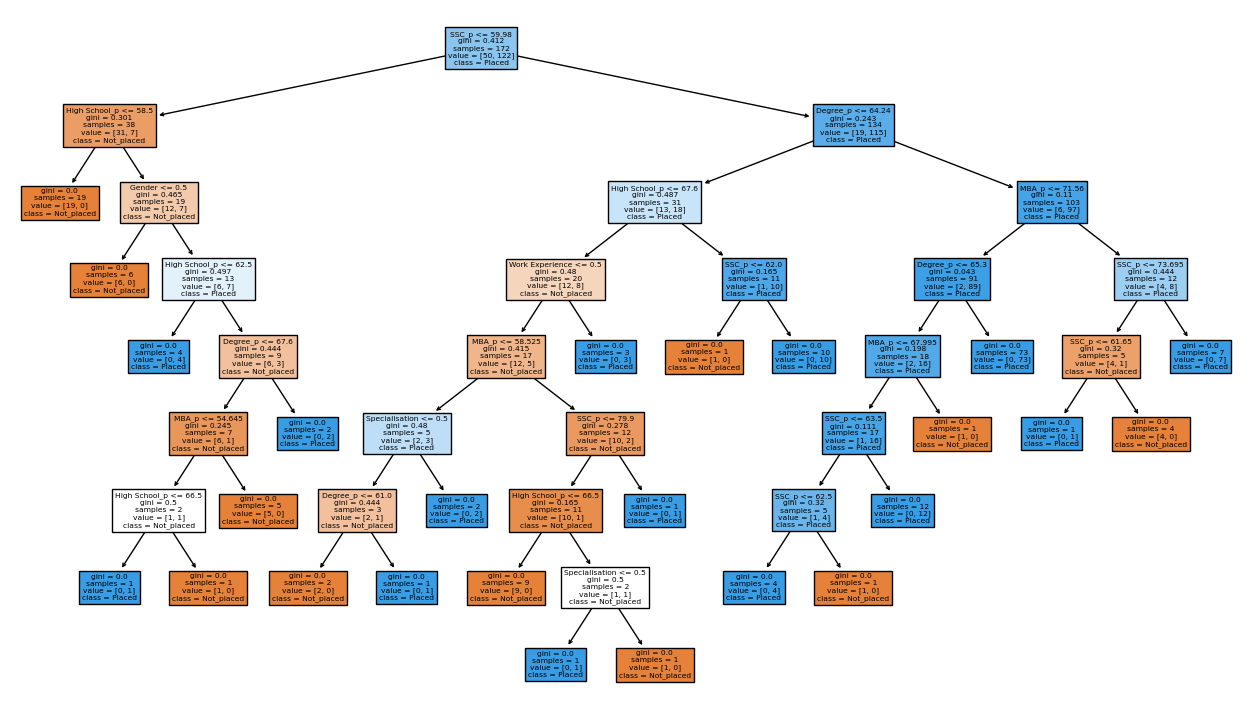

In [101]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

In [102]:
costpath = dc.cost_complexity_pruning_path(train,test)
ccp_alpha,impurities = costpath.ccp_alphas,costpath.impurities

In [103]:
costpath

{'ccp_alphas': array([0.        , 0.00413437, 0.00422833, 0.00422833, 0.00426357,
        0.00434109, 0.00473435, 0.00620897, 0.00697674, 0.01178068,
        0.01185342, 0.0119541 , 0.01434505, 0.01522199, 0.01963357,
        0.04354394, 0.14599558]),
 'impurities': array([0.        , 0.00826873, 0.01672539, 0.02518205, 0.03370918,
        0.04239136, 0.05186006, 0.07669594, 0.08367268, 0.14257607,
        0.15442948, 0.19029178, 0.20463683, 0.21985882, 0.23949239,
        0.28303633, 0.42903191])}

In [104]:
len(ccp_alpha)

17

In [105]:
modellist = []
for alpha in ccp_alpha:
    dc = DecisionTreeClassifier(ccp_alpha=alpha)
    dc.fit(X_train,y_train)
    modellist.append(dc)


In [106]:
modellist

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.004134366925064599),
 DecisionTreeClassifier(ccp_alpha=0.004228329809725159),
 DecisionTreeClassifier(ccp_alpha=0.004228329809725159),
 DecisionTreeClassifier(ccp_alpha=0.004263565891472868),
 DecisionTreeClassifier(ccp_alpha=0.004341085271317831),
 DecisionTreeClassifier(ccp_alpha=0.004734354320287392),
 DecisionTreeClassifier(ccp_alpha=0.006208968510070101),
 DecisionTreeClassifier(ccp_alpha=0.0069767441860465115),
 DecisionTreeClassifier(ccp_alpha=0.011780676876536203),
 DecisionTreeClassifier(ccp_alpha=0.011853417899929527),
 DecisionTreeClassifier(ccp_alpha=0.011954099636020114),
 DecisionTreeClassifier(ccp_alpha=0.014345049677053412),
 DecisionTreeClassifier(ccp_alpha=0.015221987315010573),
 DecisionTreeClassifier(ccp_alpha=0.019633565458658242),
 DecisionTreeClassifier(ccp_alpha=0.043543939616998095),
 DecisionTreeClassifier(ccp_alpha=0.14599558360017156)]

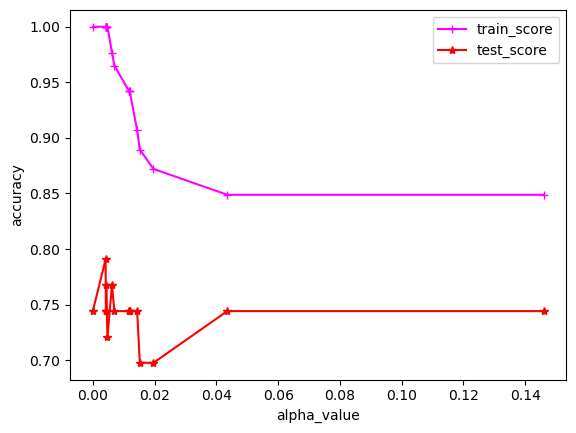

In [107]:
train_score = [clf.score(X_train,y_train) for clf in modellist]
test_score = [clf.score(X_test,y_test) for clf in modellist]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,label = 'train_score',marker = '+',color = 'magenta')
plt.plot(ccp_alpha,test_score,label = 'test_score',marker = '*',color = 'red')
plt.legend()
plt.show()

[Text(0.4, 0.875, 'SSC_p <= 59.98\ngini = 0.412\nsamples = 172\nvalue = [50, 122]\nclass = Placed'),
 Text(0.2, 0.625, 'gini = 0.301\nsamples = 38\nvalue = [31, 7]\nclass = Not_placed'),
 Text(0.6, 0.625, 'Degree_p <= 64.24\ngini = 0.243\nsamples = 134\nvalue = [19, 115]\nclass = Placed'),
 Text(0.4, 0.375, 'High School_p <= 67.6\ngini = 0.487\nsamples = 31\nvalue = [13, 18]\nclass = Placed'),
 Text(0.2, 0.125, 'gini = 0.48\nsamples = 20\nvalue = [12, 8]\nclass = Not_placed'),
 Text(0.6, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]\nclass = Placed'),
 Text(0.8, 0.375, 'gini = 0.11\nsamples = 103\nvalue = [6, 97]\nclass = Placed')]

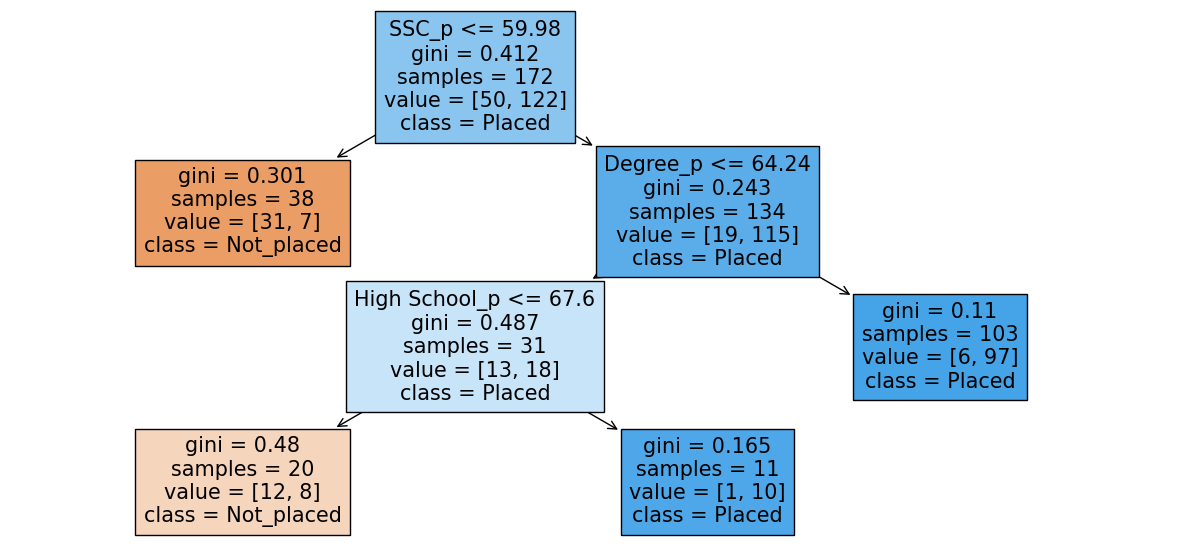

In [108]:
dc = DecisionTreeClassifier(ccp_alpha=0.0195)
dc.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

# Hyperparameter Tuning

In [109]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [111]:
scores = []
for model_name,mp in params.items():
    
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1207, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 90, in _check_multi_class
    r

In [112]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_score','best_estimator'])
scores_df.head()

,model_name,best_score,best_estimator
0,RandomForest,0.871597,"(DecisionTreeClassifier(ccp_alpha=0.02, max_de..."
1,logistic,0.872437,"LogisticRegression(max_iter=28, tol=0.25)"
2,D-tree,0.825378,"DecisionTreeClassifier(ccp_alpha=0.0195, max_f..."
3,SVM,0.854118,"SVC(C=0.75, max_iter=111, tol=1e-05)"


In [113]:
scores

[{'model_name': 'RandomForest',
  'best_score': 0.8715966386554621,
  'best_estimator': RandomForestClassifier(ccp_alpha=0.02, max_depth=22, min_samples_leaf=5,
                         min_samples_split=5, n_estimators=800)},
 {'model_name': 'logistic',
  'best_score': 0.8724369747899159,
  'best_estimator': LogisticRegression(max_iter=28, tol=0.25)},
 {'model_name': 'D-tree',
  'best_score': 0.8253781512605043,
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.0195, max_features='auto',
                         min_samples_leaf=5)},
 {'model_name': 'SVM',
  'best_score': 0.8541176470588235,
  'best_estimator': SVC(C=0.75, max_iter=111, tol=1e-05)}]

In [114]:
# random forest model


rf = RandomForestClassifier(ccp_alpha=0.019, max_depth=22, max_features='sqrt',
                         min_samples_leaf=10, min_samples_split=5,
                         n_estimators=267)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7906976744186046


In [115]:
# logistic regression

lr = LogisticRegression(C=0.25, max_iter=111, multi_class='ovr', solver='newton-cg',
                     tol=1e-05)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))


0.8372093023255814


In [116]:
# decision tree

dc = DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         max_features='auto', min_samples_leaf=5,
                         min_samples_split=5, splitter='random')
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7674418604651163


C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [117]:
print(metrics.classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.77      0.92      0.84        26

    accuracy                           0.79        43
   macro avg       0.80      0.76      0.77        43
weighted avg       0.80      0.79      0.78        43



<Axes: >

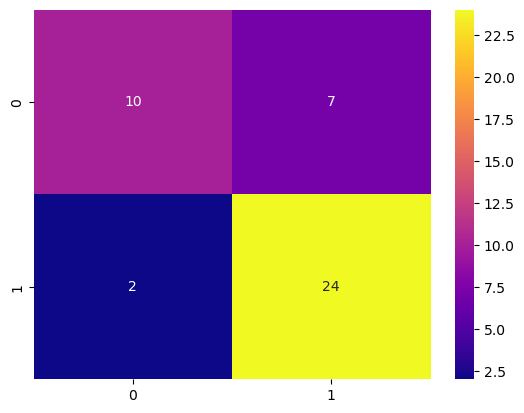

In [119]:
cn = metrics.confusion_matrix(y_test,rf.predict(X_test))
sns.heatmap(cn,annot=True,cmap='plasma')

# Model Testing

In [120]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict([traindata[i]]))
    
predicted

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [122]:
resultdf = train.copy()
resultdf['Actual'] = np.array(test)
resultdf['Predicted'] = np.array(predicted)
resultdf.head()

,Gender,Specialisation,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted
0,1,1,0,67.00,91.00,58.00,58.80,1,1
1,1,0,1,79.33,78.33,77.48,66.28,1,1
2,1,0,0,65.00,68.00,64.00,57.80,1,1
3,1,1,0,56.00,52.00,52.00,59.43,0,0
4,1,0,0,85.80,73.60,73.30,55.50,1,1


In [123]:
resultdf['Actual'].value_counts()

1    148
0     67
Name: Actual, dtype: int64

In [124]:
resultdf['Predicted'].value_counts()

1    165
0     50
Name: Predicted, dtype: int64

In [125]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

### Predicted Probability

In [126]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict_proba([traindata[i]]))
    
predicted

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:4

[array([[0.31901407, 0.68098593]]),
 array([[0.07273972, 0.92726028]]),
 array([[0.19869043, 0.80130957]]),
 array([[0.85290273, 0.14709727]]),
 array([[0.07672667, 0.92327333]]),
 array([[0.53221601, 0.46778399]]),
 array([[0.58685706, 0.41314294]]),
 array([[0.08775149, 0.91224851]]),
 array([[0.06752984, 0.93247016]]),
 array([[0.50601533, 0.49398467]]),
 array([[0.53063157, 0.46936843]]),
 array([[0.07709966, 0.92290034]]),
 array([[0.72490408, 0.27509592]]),
 array([[0.30380298, 0.69619702]]),
 array([[0.65015187, 0.34984813]]),
 array([[0.09100967, 0.90899033]]),
 array([[0.17480044, 0.82519956]]),
 array([[0.60764229, 0.39235771]]),
 array([[0.45597433, 0.54402567]]),
 array([[0.22107813, 0.77892187]]),
 array([[0.20892312, 0.79107688]]),
 array([[0.097316, 0.902684]]),
 array([[0.13597872, 0.86402128]]),
 array([[0.16325349, 0.83674651]]),
 array([[0.09902657, 0.90097343]]),
 array([[0.739928, 0.260072]]),
 array([[0.0781063, 0.9218937]]),
 array([[0.16054697, 0.83945303]]),
 a

In [127]:
predicted[0][0],predicted[0][0][0],predicted[0][0][1]

(array([0.31901407, 0.68098593]), 0.3190140667915971, 0.6809859332084026)

In [128]:
resultdf['Prob_not_getting_placed'] = np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed'] = np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf

,Gender,Specialisation,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,1,1,0,67.00,91.00,58.00,58.80,1,1,0.319014,0.680986
1,1,0,1,79.33,78.33,77.48,66.28,1,1,0.072740,0.927260
2,1,0,0,65.00,68.00,64.00,57.80,1,1,0.198690,0.801310
3,1,1,0,56.00,52.00,52.00,59.43,0,0,0.852903,0.147097
4,1,0,0,85.80,73.60,73.30,55.50,1,1,0.076727,0.923273
...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,80.60,82.00,77.60,74.49,1,1,0.099027,0.900973
211,1,0,0,58.00,60.00,72.00,53.62,1,1,0.365916,0.634084
212,1,0,1,67.00,67.00,73.00,69.72,1,1,0.107211,0.892789
213,0,1,0,74.00,66.00,58.00,60.23,1,1,0.376930,0.623070


In [129]:
# saving the model

import pickle
file = open('campusplacementpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()

### Conclusions


 + 16 records were missclassified,resulting in the accuracy of 93% on testing data
 + Random Forest model gave the best results
 